In [1]:
import pandas as pd
import matplotlib.pyplot as plt    # import matplotlib
import numpy as np                 # import numpy
import time                        # import time
import ipywidgets as widgets       # interactive display
from scipy.stats import pearsonr   # import pearson correlation

fig_w, fig_h = (6, 4)
plt.rcParams.update({'figure.figsize': (fig_w, fig_h)})

In [2]:
def default_pars( **kwargs):
    pars = {}
    
    pars['snr']    = 0.08 #Source of resting phagocytes
    pars['unr']    = 0.12 #Decay rate of resting phagocytes

    pars['kpn']    = 1.8 #Rate at which activated phagocytes (N*) consume pathogen
    pars['knp']    = 0.1 # Activation of resting phagocytes (NR) by pathogen
    pars['knn']    = 0.01 # Activation of resting phagocytes by previously activated phagocytes and their cytokines
    pars['un']    = 0.05 #Decay rate of activated phagocytes
    
    
    ### simulation parameters ###
    pars['T'] = 200. # Total duration of simulation [ms]
    pars['dt'] = .01  # Simulation time step [ms]

    ### external parameters if any ###
    for k in kwargs:
        pars[k] = kwargs[k]
    
    pars['range_t'] = np.arange(0, pars['T'], pars['dt']) # Vector of discretized time points [ms]
        
    return pars    

In [23]:
def run_phagoctye_model(pars,Nact_init,P):
    
        # Set parameters
    snr = pars['snr']
    unr = pars['unr']
    
#     kpn = pars['kpn']    
    knp = pars['knp']    
    knn = pars['knn']
    un = pars['un']
    
    dt, range_t = pars['dt'], pars['range_t']
    Lt = range_t.size
    
    Nact = np.zeros(Lt) # non-specific local response levels
    NR = np.zeros(Lt)
    
    Nact[0]= Nact_init    
    
    for it in range(Lt-1):                
        R1 = knn* Nact[it] + knp*P
        dNact = ((snr*R1/(unr+R1)) - un*Nact[it]) *dt
        NR[it] = snr/(unr+R1)
        #update
        Nact[it+1] = Nact[it] + dNact
    return(Nact,NR)

(0.0003636363636363636,
 0.36363035321730225,
 0.7562270205369346,
 array([0.35155213]))

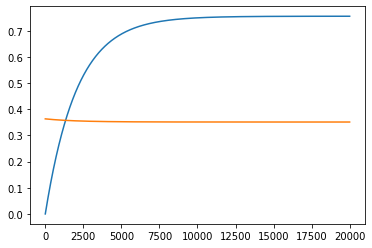

In [45]:
pars = default_pars()
Nact_init=0
P=1
Nact,NR =run_phagoctye_model(pars,Nact_init,P)
plt.plot(Nact)
plt.plot(NR[:-1])
Nact[1],NR[1],Nact[-1],NR[-2:-1]

(0.0, array([0.66666667]))

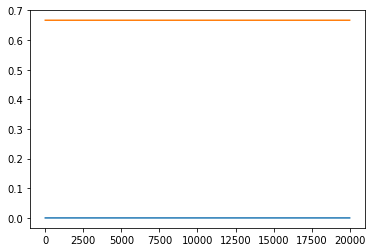

In [46]:
pars = default_pars()
Nact_init=0
P=0
Nact,NR =run_phagoctye_model(pars,Nact_init,P)
plt.plot(Nact)
plt.plot(NR[:-1])
Nact[-1],NR[-2:-1]

In [5]:

# def NR_steady_state(pars,Nact,P):
#     snr = pars['snr']   
#     unr = pars['unr']
#     knp = pars['knp']    
#     knn = pars['knn']    
#     un = pars['un']
    
#     b = (un*knp*P - snr*knn +un*unr)
#     a = un*knn
#     c = -snr*knp*P
    
#     Nact_steady1 = (-b + np.sqrt(np.power(b,2)-4*a*c))/2*a
#     Nact_steady2 = (-b - np.sqrt(np.power(b,2)-4*a*c))/2*a
#     return(Nact_steady1,Nact_steady2)

In [6]:
# pars = default_pars()
# Nact=0
# P=2
# NR_steady_state(pars,Nact,P)

In [7]:
# un*Nact*knn* Nact + un*Nact*knp*P - snr*knn* Nact +un*Nact*unr -snr*knp*P

# un*knn *Nact^2 + (un*knp*P - snr*knn +un*unr) * Nact - snr*knp*P

In [8]:
# un*knn *Nact^2 + (un*knp*P - snr*knn +un*unr) * Nact - snr*knp*P
# b = (un*knp*P - snr*knn +un*unr)
# a = un*knn
# c = snr*knp*P

In [35]:
# 0.08/0.12